In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [2]:
# Define rmsemape function
def rmsemape(y_Test, predicted_stock_price_test_ori):
    mse = mean_squared_error(y_Test, predicted_stock_price_test_ori)
    rmse = np.sqrt(mse)
    print("RMSE-Testset:", rmse)
    mape = np.mean(np.abs((y_Test - predicted_stock_price_test_ori) / y_Test)) * 100
    print("MAPE-Testset:", mape)


In [3]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Close"]]


[*********************100%%**********************]  1 of 1 completed


In [4]:
stk_data

,Close
Date,
2021-07-01,746.450012
2021-07-02,750.650024
2021-07-05,760.349976
2021-07-06,758.349976
2021-07-07,762.900024
...,...
2022-01-19,729.599976
2022-01-20,728.900024
2022-01-21,712.500000


In [6]:
# Normalize data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Close"])
data1

,Close
0,0.491495
1,0.513145
2,0.563144
3,0.552835
4,0.576289
...,...
138,0.404639
139,0.401031
140,0.316495
141,0.275773


In [9]:
# Train-test split
training_size = round(len(data1) * 0.80)
train_data, test_data = data1[:training_size], data1[training_size:]


In [10]:
train_data

,Close
0,0.491495
1,0.513145
2,0.563144
3,0.552835
4,0.576289
...,...
109,0.220876
110,0.190464
111,0.272681
112,0.308248


In [11]:
test_data

,Close
114,0.301804
115,0.194846
116,0.119845
117,0.076031
118,0.094072
119,0.142784
120,0.084536
121,0.108505
122,0.125516
123,0.100000


In [26]:
# Fit MA model
order = (0, 0, 4)  # (p, d, q) where p=0, d=0, q=4 for MA model
model = ARIMA(train_data['Close'], order=order)
model_fit = model.fit()

C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [27]:
# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Close'])
forecast_df

,Close
114,NaN
115,NaN
116,NaN
117,NaN
118,NaN
119,NaN
120,NaN
121,NaN
122,NaN
123,NaN


In [28]:
forecast

114    0.326352
115    0.368813
116    0.444865
117    0.508434
118    0.528047
119    0.528047
120    0.528047
121    0.528047
122    0.528047
123    0.528047
124    0.528047
125    0.528047
126    0.528047
127    0.528047
128    0.528047
129    0.528047
130    0.528047
131    0.528047
132    0.528047
133    0.528047
134    0.528047
135    0.528047
136    0.528047
137    0.528047
138    0.528047
139    0.528047
140    0.528047
141    0.528047
142    0.528047
Name: predicted_mean, dtype: float64

In [29]:
# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Close'])


In [30]:
# Inverse transform the forecasted data
forecast_df_inv = Ms.inverse_transform(forecast_df)
test_data_inv = Ms.inverse_transform(test_data)
test_data_inv

array([[709.65002441],
       [688.90002441],
       [674.34997559],
       [665.84997559],
       [669.34997559],
       [678.79998779],
       [667.5       ],
       [672.15002441],
       [675.45001221],
       [670.5       ],
       [668.84997559],
       [678.54998779],
       [696.34997559],
       [709.15002441],
       [726.90002441],
       [730.29998779],
       [730.59997559],
       [742.79998779],
       [743.25      ],
       [746.84997559],
       [740.70001221],
       [721.70001221],
       [712.65002441],
       [725.20001221],
       [729.59997559],
       [728.90002441],
       [712.5       ],
       [704.59997559],
       [752.20001221]])

In [31]:
# Convert to DataFrame
forecast_df_inv = pd.DataFrame(forecast_df_inv, columns=["Close"])
test_data_inv = pd.DataFrame(test_data_inv, columns=["Close"])
test_data_inv

,Close
0,709.650024
1,688.900024
2,674.349976
3,665.849976
4,669.349976
5,678.799988
6,667.500000
7,672.150024
8,675.450012
9,670.500000


In [32]:
# Check for NaN or infinite values
if np.any(np.isnan(forecast_df_inv)) or np.any(np.isinf(forecast_df_inv)):
    print("Forecast contains NaN or infinite values. Please check the model or data preprocessing steps.")
else:
    # Evaluation
    print("Evaluating Close prices")
    rmsemape(test_data_inv['Close'], forecast_df_inv['Close'])
    print("************")

Forecast contains NaN or infinite values. Please check the model or data preprocessing steps.


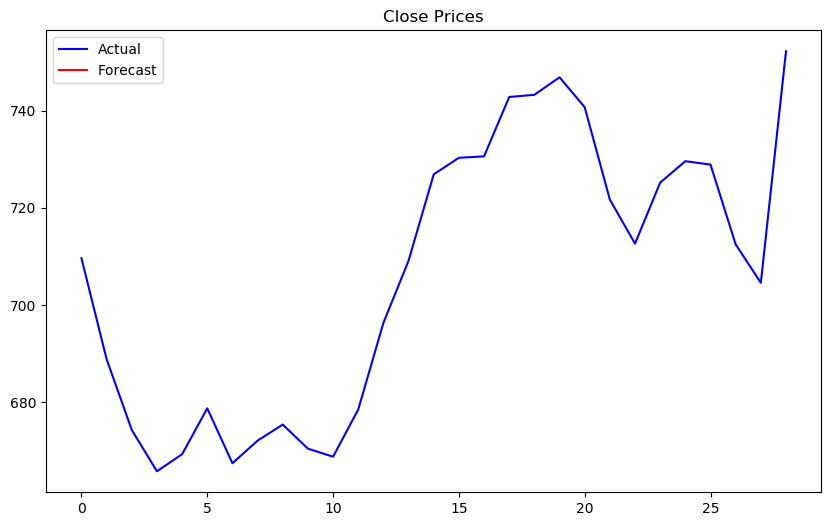

In [25]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(test_data_inv['Close'], label='Actual', color='blue')
plt.plot(forecast_df_inv['Close'], label='Forecast', color='red')
plt.title('Close Prices')
plt.legend()
plt.show()